<a href="https://colab.research.google.com/github/andysontran/13-CHL5230-F23/blob/main/Datathon2_KL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data exploration & processing

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#add upload code
from google.colab import files
uploaded = files.upload()

# Load the Cardiovascular Event Dataset
data = pd.read_csv('Cardiovascular Event Dataset.csv')
data

Saving Cardiovascular Event Dataset.csv to Cardiovascular Event Dataset.csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**DATA PRE-PROCESSING**

In [2]:
# Remove the id row
data.drop('id', axis=1, inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


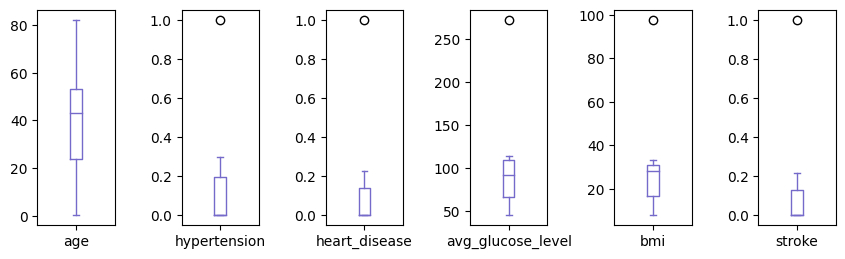

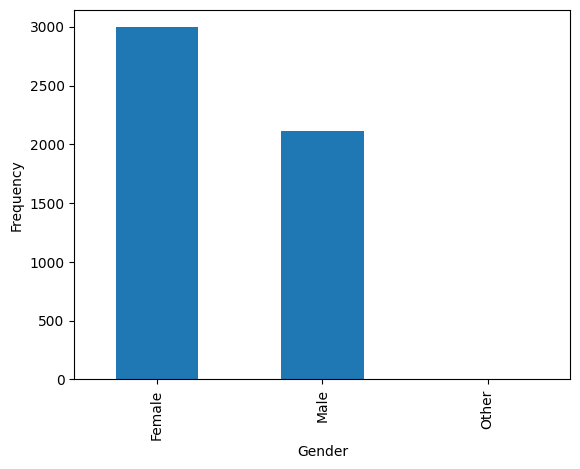

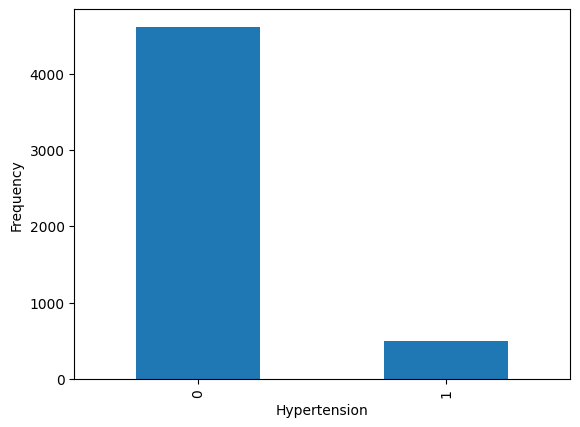

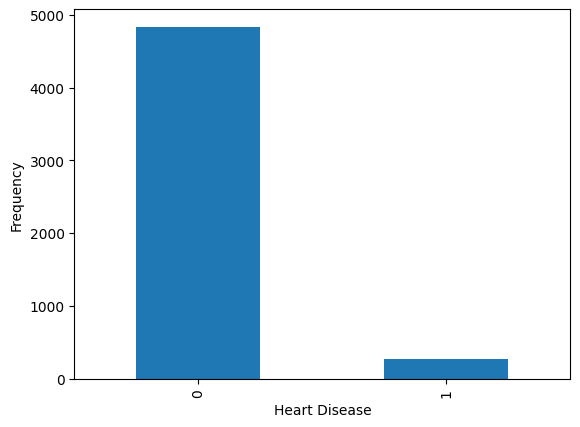

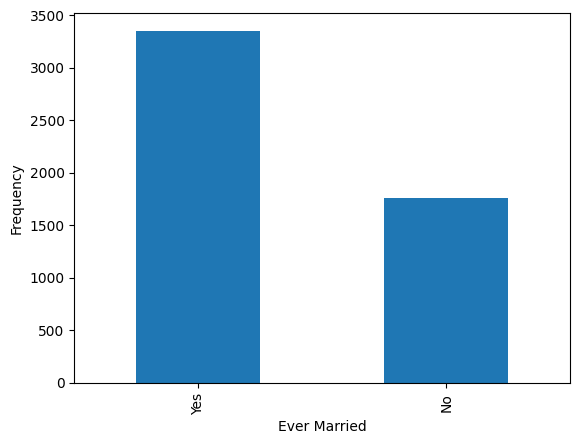

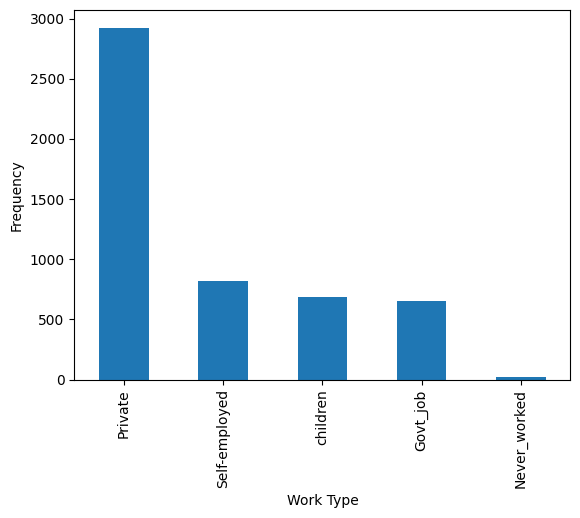

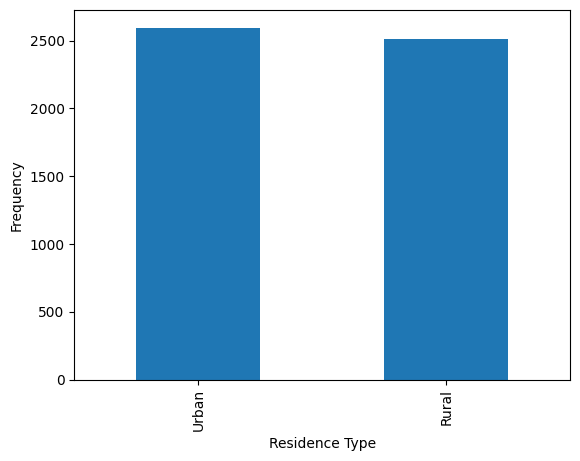

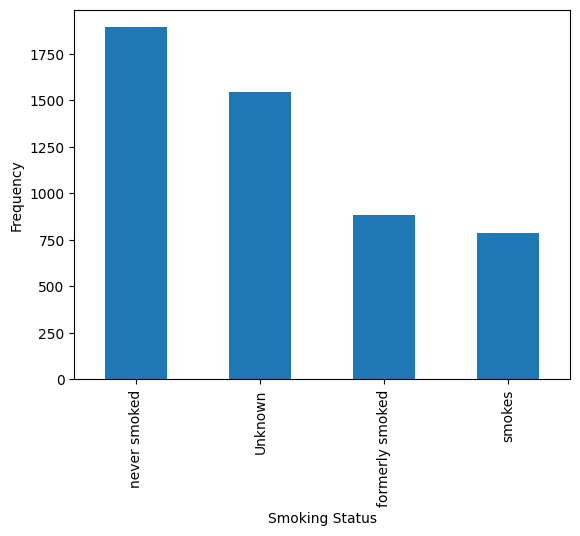

In [3]:
# Exploration of the dataset, dropping the 'count' row for better visualization
description = data.describe()
description
description = description.drop('count')

# Plot some graphs to visually show data distribution

# Box and whisker plots (only looking at continuous variables)
description.plot(kind='box', subplots=True, layout=(2, 7), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

# Bar graphs (for categorical variables)
data['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()
data['hypertension'].value_counts().plot(kind='bar')
plt.xlabel('Hypertension')
plt.ylabel('Frequency')
plt.show()
data['heart_disease'].value_counts().plot(kind='bar')
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.show()
data['ever_married'].value_counts().plot(kind='bar')
plt.xlabel('Ever Married')
plt.ylabel('Frequency')
plt.show()
data['work_type'].value_counts().plot(kind='bar')
plt.xlabel('Work Type')
plt.ylabel('Frequency')
plt.show()
data['Residence_type'].value_counts().plot(kind='bar')
plt.xlabel('Residence Type')
plt.ylabel('Frequency')
plt.show()
data['smoking_status'].value_counts().plot(kind='bar')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.show()

In [4]:
# Since smoking_status has more than 1500 Unknown values, which is about 30% of the sample, we decided to exclude this variable from our analysis
data.drop ('smoking_status', axis=1, inplace=True)

In [5]:
# Since gender=Other only has 1 observation in the dataset, we decided to drop this row from our analysis
data.drop(3116,axis=0,inplace=True)

In [6]:
# Remove implausible values in BMI, specifically the observations with BMI=97.6, 92, and 78

print(data.bmi.describe()) #max 97

data.drop(2128,axis=0,inplace=True)
data.drop(4209,axis=0,inplace=True)
data.drop(928,axis=0,inplace=True)

print(data.bmi.describe()) #max 71

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64
count    4905.000000
mean       28.857676
std         7.711056
min        10.300000
25%        23.500000
50%        28.000000
75%        33.100000
max        71.900000
Name: bmi, dtype: float64


In [7]:
# Since children in the dataset skew age and BMI (and as BMI is not as accurate for youth), we decided to restrict our models to adults only, so remove work_type=children
data = data[data.work_type != 'children']

# and remove anyone under age 18
data = data[data.age >= 18]

In [8]:
# Code the binary variables gender, ever_married, Residence_type into numerical values;
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
data['ever_married'] = data['ever_married'].map({'No': 0, 'Yes': 1})
data['Residence_type'] = data['Residence_type'].map({'Rural': 0, 'Urban': 1})

In [9]:
# Create one-hot coding for work_type
data['work_type_Private'] = np.where(data['work_type']=='Private', 1, 0)
data['work_type_Selfemployed'] = np.where(data['work_type']=='Self-employed', 1, 0)
data['work_type_Govtjob'] = np.where(data['work_type']=='Govt_job', 1, 0)
data['work_type_Never'] = np.where(data['work_type']=='Never_worked', 1, 0)

data #check coding

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Selfemployed,work_type_Govtjob,work_type_Never
0,0,67.0,0,1,1,Private,1,228.69,36.6,1,1,0,0,0
1,1,61.0,0,0,1,Self-employed,0,202.21,NaN,1,0,1,0,0
2,0,80.0,0,1,1,Private,0,105.92,32.5,1,1,0,0,0
3,1,49.0,0,0,1,Private,1,171.23,34.4,1,1,0,0,0
4,1,79.0,1,0,1,Self-employed,0,174.12,24.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,Private,1,83.75,NaN,0,1,0,0,0
5106,1,81.0,0,0,1,Self-employed,1,125.20,40.0,0,0,1,0,0
5107,1,35.0,0,0,1,Self-employed,0,82.99,30.6,0,0,1,0,0
5108,0,51.0,0,0,1,Private,0,166.29,25.6,0,1,0,0,0


In [10]:
# Check for missing values in each column
print(data.isnull().sum())

gender                      0
age                         0
hypertension                0
heart_disease               0
ever_married                0
work_type                   0
Residence_type              0
avg_glucose_level           0
bmi                       181
stroke                      0
work_type_Private           0
work_type_Selfemployed      0
work_type_Govtjob           0
work_type_Never             0
dtype: int64


In [11]:
# For BMI, replace zeros with nan to handle missing values
data[['bmi']] = data[['bmi']].replace(0, np.nan)

# Fill missing values with median
data.fillna(data.median(), inplace=True)

# Check to see if there are no more missing values
print(data.isnull().sum())

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
stroke                    0
work_type_Private         0
work_type_Selfemployed    0
work_type_Govtjob         0
work_type_Never           0
dtype: int64


In [12]:
# Explore dataset again, after pre-processing of data
description = data.describe()
description


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Selfemployed,work_type_Govtjob,work_type_Never
count,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000
mean,0.605740,50.217125,0.116443,0.064691,0.788520,0.509998,108.527398,30.356481,0.058104,0.655846,0.189838,0.153140,0.001176
std,0.488749,17.825590,0.320793,0.246008,0.408406,0.499959,47.773064,6.983861,0.233967,0.475148,0.392219,0.360165,0.034280
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.000000,0.000000,0.000000,1.000000,0.000000,77.495000,25.600000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,51.000000,0.000000,0.000000,1.000000,1.000000,92.490000,29.200000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,64.000000,0.000000,0.000000,1.000000,1.000000,116.130000,33.800000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,71.900000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

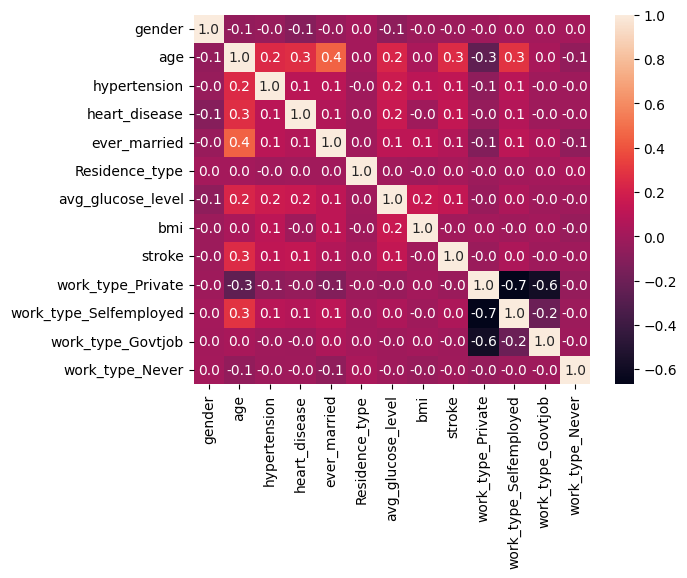

In [13]:
# Correlation matrix to quantify relationships (this might not be super helpful for us, since we have so many categorical variables. i think we should just fix for collinearity using L1 or L2
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f")
# For the continuous variables, they don't seem to be heavily correlated with each other
# highest correlation is age and ever married, which makes sense
# stroke has correlation=0 with bmi and work type

## Logistic Regression

In [14]:
### Prepare data for logistic regr

#drop work_type, since we added dummy coding
data.drop ('work_type', axis=1, inplace=True)

In [15]:
# Split the data into features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
  #L1 to help with feature selection
  #C=1 is moderate regularization
  #liblinear is good for binary outcomes
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       789
           1       0.00      0.00      0.00        62

    accuracy                           0.93       851
   macro avg       0.46      0.50      0.48       851
weighted avg       0.86      0.93      0.89       851


Confusion Matrix:
[[789   0]
 [ 62   0]] 



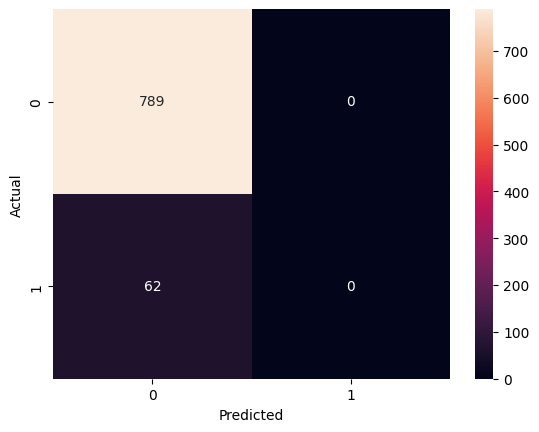

In [17]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix,"\n")

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show() #why did it not predict any 1s LMAOOO

In [18]:
# Training logistic regression model, with l2 instead
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
  #L1 to help with feature selection
  #C=1 is moderate regularization
  #liblinear is good for binary outcomes
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       789
           1       0.00      0.00      0.00        62

    accuracy                           0.93       851
   macro avg       0.46      0.50      0.48       851
weighted avg       0.86      0.93      0.89       851


Confusion Matrix:
[[789   0]
 [ 62   0]] 



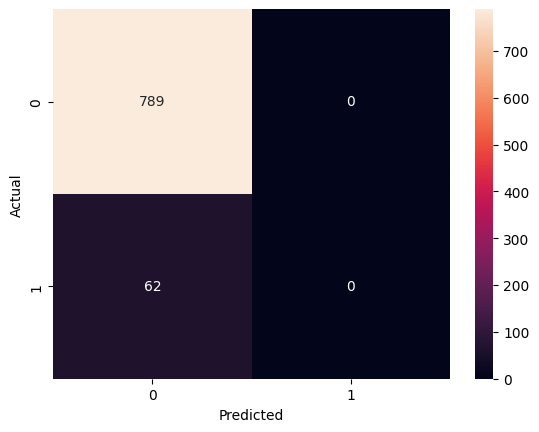

In [19]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix,"\n")

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show() #why did it not predict any 1s LMAOOO

Although the classification report shows a good precision of 93%, this is because stroke is a rare outcome and therefore the model did not predict any occurences of stroke. Therefore, this model would not actually be useful in real life.

Because no occurences of stroke were predicted, we did not explore individual logistic regression models for each feature.

In [20]:
### model summary

import statsmodels.api as sm
import pandas as pd

# Separate features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

         Current function value: 0.182920
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 4251
Model:                          Logit   Df Residuals:                     4238
Method:                           MLE   Df Model:                           12
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.1750
Time:                        23:57:43   Log-Likelihood:                -777.59
converged:                      False   LL-Null:                       -942.52
Covariance Type:            nonrobust   LLR p-value:                 2.462e-63
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -55.8979   5.82e+06   -9.6e-06      1.000   -1.14e+07    1.14e+07
gender                    -0.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model summary


*   Pseudo R2 is 0.175, which means only 17.5% of the variation in the data is explained by the model
*   The features age, hypertension, and average glucose level have p-values that are significant with a threshold of 0.05. These features may affect odds of stroke more than other features



